In [1]:
1+2


3

In [2]:
import uproot
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import h5py
import math

from util import *

import var
import cut
import data
import hist

import importlib

from pyanalib import panda_helpers
#from unc_funcs import *
from unc_samples import *
    # Note Sept. 5, 2024: unc_samples does not force any (un)containment.
#from unc_MC_overhead import *    



In [3]:
# Gray made these as TESTS (before scaling to higher stats.)

path = '/exp/icarus/data/users/jdyer/dimuon-data/2411_moreAlps/lostats/'


In [4]:
# No Preselection Applied.

new_files_noPresel = [
    path + 'no_presel_applied/ma300_faE6.df',
    path + 'no_presel_applied/ma350_faE6.df',
    path + 'no_presel_applied/ma400_faE6.df',
    path + 'no_presel_applied/ma450_faE6.df',
    path + 'no_presel_applied/ma500_faE6.df',
    #path + 'no_presel_applied/ms300.df'
]

newfiles_nops_alp_mcdfs = [pd.read_hdf(f, key="mch") for f in new_files_noPresel]
newfiles_nops_alp_mcnudfs = [pd.read_hdf(f, key="mcnu") for f in new_files_noPresel]
for i, mch in enumerate(newfiles_nops_alp_mcdfs):
    ALPdir = mch.exit-mch.enter
    ALPdir_mag = np.linalg.norm(ALPdir, axis=1)
    ALPdir = ALPdir/ALPdir_mag[:, None]
    mch["POIdir","x"] = ALPdir.x
    mch["POIdir","y"] = ALPdir.y
    mch["POIdir","z"] = ALPdir.z
    newfiles_nops_alp_mcnudfs[i]["POIdir_x"] = ALPdir.x
    newfiles_nops_alp_mcnudfs[i]["POIdir_y"] = ALPdir.y
    newfiles_nops_alp_mcnudfs[i]["POIdir_z"] = ALPdir.z

newfiles_nops_alp_masses = [int(round(df.iloc[(0)].M*1000.)) for df in newfiles_nops_alp_mcdfs]
newfiles_nops_alp_fa = [float(df.iloc[(0)].C1) for df in newfiles_nops_alp_mcdfs] #play with this one!
newfiles_nops_alp_cAl = [float(df.iloc[(0)].C2) for df in newfiles_nops_alp_mcdfs]
#print(alp_nosup_masses, alp_nosup_fa, alp_nosup_cAl, sep='\n')
newfiles_nops_alp_mass_labels = []
newfiles_nops_alp_fa_labels = []
newfiles_nops_alp_cAl_labels = []
newfiles_nops_alp_labels = []
for i in range(len(new_files_noPresel)):
    newfiles_nops_alp_mass_labels.append("$M_{ALP}$ = %a" % newfiles_nops_alp_masses[i])
    newfiles_nops_alp_fa_labels.append("$fa$ = %a" % "{:.1e}".format(newfiles_nops_alp_fa[i]))
    if len(str(newfiles_nops_alp_fa[i]))-str(newfiles_nops_alp_fa[i]).count('0') > 2:
        print('WARNING: Your fa labels might be misleading. You should double check them, and fix if needed.')
    newfiles_nops_alp_cAl_labels.append("$c$ = %a" % newfiles_nops_alp_cAl[i])
    newfiles_nops_alp_labels.append(newfiles_nops_alp_mass_labels[i] + ", " + newfiles_nops_alp_cAl_labels[i] + ", " + newfiles_nops_alp_fa_labels[i])

newfiles_nops_alp_hdrs = [pd.read_hdf(f, key="hdr") for f in new_files_noPresel]
newfiles_nops_alp_pots = [np.sum(hdr.pot * hdr.first_in_subrun) for hdr in newfiles_nops_alp_hdrs]
newfiles_nops_alp_evtdfs = [pd.read_hdf(f, key="evt") for f in new_files_noPresel]

In [5]:
# WITH preselection applied.

new_alp_files_wPresel = [
    path + 'presel_applied/ma300_faE6.df',
    path + 'presel_applied/ma350_faE6.df',
    path + 'presel_applied/ma400_faE6.df',
    path + 'presel_applied/ma450_faE6.df',
    path + 'presel_applied/ma500_faE6.df',
    #path + 'presel_applied/ms300.df'
]

newfiles_wps_alp_mcdfs = [pd.read_hdf(f, key="mch") for f in new_alp_files_wPresel]
newfiles_wps_alp_mcnudfs = [pd.read_hdf(f, key="mcnu") for f in new_alp_files_wPresel]
for i, mch in enumerate(newfiles_nops_alp_mcdfs):
    ALPdir = mch.exit-mch.enter
    ALPdir_mag = np.linalg.norm(ALPdir, axis=1)
    ALPdir = ALPdir/ALPdir_mag[:, None]
    mch["POIdir","x"] = ALPdir.x
    mch["POIdir","y"] = ALPdir.y
    mch["POIdir","z"] = ALPdir.z
    newfiles_wps_alp_mcnudfs[i]["POIdir_x"] = ALPdir.x
    newfiles_wps_alp_mcnudfs[i]["POIdir_y"] = ALPdir.y
    newfiles_wps_alp_mcnudfs[i]["POIdir_z"] = ALPdir.z

newfiles_wps_alp_masses = [int(round(df.iloc[(0)].M*1000.)) for df in newfiles_wps_alp_mcdfs]
newfiles_wps_alp_fa = [float(df.iloc[(0)].C1) for df in newfiles_wps_alp_mcdfs] #play with this one!
newfiles_wps_alp_cAl = [float(df.iloc[(0)].C2) for df in newfiles_wps_alp_mcdfs]
#print(alp_nosup_masses, alp_nosup_fa, alp_nosup_cAl, sep='\n')
newfiles_wps_alp_mass_labels = []
newfiles_wps_alp_fa_labels = []
newfiles_wps_alp_cAl_labels = []
newfiles_wps_alp_labels = []
for i in range(len(new_files_noPresel)):
    newfiles_wps_alp_mass_labels.append("$M_{ALP}$ = %a" % newfiles_wps_alp_masses[i])
    newfiles_wps_alp_fa_labels.append("$fa$ = %a" % "{:.1e}".format(newfiles_wps_alp_fa[i]))
    if len(str(newfiles_wps_alp_fa[i]))-str(newfiles_wps_alp_fa[i]).count('0') > 2:
        print('WARNING: Your fa labels might be misleading. You should double check them, and fix if needed.')
    newfiles_wps_alp_cAl_labels.append("$c$ = %a" % newfiles_wps_alp_cAl[i])
    newfiles_wps_alp_labels.append(newfiles_wps_alp_mass_labels[i] + ", " + newfiles_wps_alp_cAl_labels[i] + ", " + newfiles_wps_alp_fa_labels[i])

newfiles_wps_alp_hdrs = [pd.read_hdf(f, key="hdr") for f in new_alp_files_wPresel]
newfiles_wps_alp_pots = [np.sum(hdr.pot * hdr.first_in_subrun) for hdr in newfiles_wps_alp_hdrs]
newfiles_wps_alp_evtdfs = [pd.read_hdf(f, key="evt") for f in new_alp_files_wPresel]

### Check the parameters, and how many events are in (and were GENERATED for) each sample: 

In [6]:
# No preselection applied
newfiles_nops_alp_ngen = [np.sum(hdr.ngenevt * hdr.first_in_subrun) for hdr in newfiles_nops_alp_hdrs]
print('No Preselection Applied:')
print("Slices in evt dataframe / Generated Events : ")
for i, df in enumerate(newfiles_nops_alp_evtdfs):
    print(newfiles_nops_alp_labels[i]+': %a / %a = %a' % 
          (df.shape[0], newfiles_nops_alp_ngen[i], df.shape[0]/newfiles_nops_alp_ngen[i]))
    
print('\n')

# With preselection applied
newfiles_wps_alp_ngen = [np.sum(hdr.ngenevt * hdr.first_in_subrun) for hdr in newfiles_wps_alp_hdrs]
print('WITH Preselection Applied:')
print("Slices in evt dataframe / Generated Events : ")
for i, df in enumerate(newfiles_wps_alp_evtdfs):
    print(newfiles_wps_alp_labels[i]+': %a / %a = %a' % 
          (df.shape[0], newfiles_wps_alp_ngen[i], df.shape[0]/newfiles_wps_alp_ngen[i]))

No Preselection Applied:
Slices in evt dataframe / Generated Events : 
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06': 319 / 625 = 0.5104
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06': 345 / 625 = 0.552
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06': 323 / 625 = 0.5168
$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = '1.0e+06': 304 / 625 = 0.4864
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06': 331 / 600 = 0.5516666666666666


WITH Preselection Applied:
Slices in evt dataframe / Generated Events : 
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06': 285 / 625 = 0.456
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06': 309 / 625 = 0.4944
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06': 293 / 625 = 0.4688
$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = '1.0e+06': 270 / 625 = 0.432
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06': 301 / 600 = 0.5016666666666667


### Check Energy Distributions
Note: Just do this for the events that do have the preselection applied.

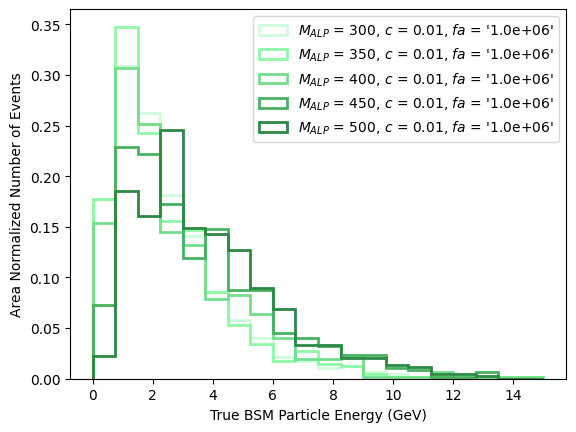

In [9]:
density = True
for i, mcdf in enumerate(newfiles_wps_alp_mcdfs):#(5):
    linewidth=2
    plt.hist(mcdf.E, bins=20, label=newfiles_wps_alp_labels[i], color=greens[i],
             histtype="step", linewidth=linewidth, density=density, range=(0,15)) 
#plt.yscale('log')
plt.legend()
plt.xlabel("True BSM Particle Energy (GeV)") # Total energy, not just kinetic.
plt.ylabel("Area Normalized Number of Events")
plt.show()

## Why do the "no preselection applied" dataframes still only have ~50% of the number of events generated?

- Gray scaled up the test samples, so now (12/1/24) I have more stats than I started with, and I’m not sure exactly which files comprised the smaller stats “test” sample.
- So now I've remade dataframes for just a subset of the big stats (will be different than the test samples I’ve already made dataframes for), with the extra data frame Gray told me to make/investigate that should have "everything" (i.e., the slctrk dataframe in configs/evtdf.py). Here is the command I ran: 

```python 
python rundf.py configs/evtdf.py /exp/icarus/data/users/jdyer/dimuon-data/2411_moreAlps/subsample_of_histats/ma400_faE6.df /pnfs/icarus/scratch/users/gputnam/DMCP2023G/jamie-gen/ALP-M400/8*/*.flat.caf.root
```

Note: At time of running that command, makedf.py was configured so that the preselection WOULD be applied.

Some other things I can look into, independently of that extra dataframe:

- Are there other places in the make-dataframes code where I can see some cuts applied (eg vertex in FV)?
- What percentage of the active volume do we consider to be fiducial?
- What is the "generation volume?" (Presumably, it is bigger than the active volume.)
Bounding-Box"
icarus_detector_box: [-368.49, 368.49, -191.86, 144.96, -904.950652270838, 904.950652270838]


In [7]:
# WITH preselection applied.

df_file = '/exp/icarus/data/users/jdyer/dimuon-data/2411_moreAlps/subsample_of_histats/ma400_faE6.df'
print(pd.HDFStore(df_file, 'r').keys())
mchdf = pd.read_hdf(df_file, key="mch")
mcnudf = pd.read_hdf(df_file, key="mcnu")

ALPdir = mchdf.exit-mchdf.enter
ALPdir_mag = np.linalg.norm(ALPdir, axis=1)
ALPdir = ALPdir/ALPdir_mag[:, None]
mchdf["POIdir","x"] = ALPdir.x
mchdf["POIdir","y"] = ALPdir.y
mchdf["POIdir","z"] = ALPdir.z
mcnudf["POIdir_x"] = ALPdir.x
mcnudf["POIdir_y"] = ALPdir.y
mcnudf["POIdir_z"] = ALPdir.z

mass = int(round(mchdf.iloc[(0)].M*1000.))
fa = float(mchdf.iloc[(0)].C1)
cAl = float(mchdf.iloc[(0)].C2)
label = "$M_{ALP}$ = %a, $fa$ = %a, $c$ = %a" % (mass, fa, cAl)

hdr = pd.read_hdf(df_file, key="hdr")
generated_events = np.sum(hdr.ngenevt * hdr.first_in_subrun)
pot = np.sum(hdr.pot*hdr.first_in_subrun)
evtdf = pd.read_hdf(df_file, key="evt")
slctrkdf = pd.read_hdf(df_file, key='slctrk')


['/evt', '/hdr', '/mch', '/mcnu', '/mcnuwgt', '/slctrk']


Cuts already embedded into slctrkdf:
- trkScoreCut = False: (so, no cut)
- trkDistCut = 10. (track start must be within 10cm of slice vertex)
- cutClearCosmic = True (exclude tracks that are labeled as clear cosmics.)

In [8]:
# Take a look at slctrk dataframe:

print('Number of generated events: %a \n' % generated_events)

print('evtdf:')
print("Number of events w/ reconstructued activity in evtdf: %a" % evtdf.droplevel(2).index.nunique())
print('Number of slices in evtdf: ', evtdf.shape[0])

print('')
print('slctrkdf:')
print("Number of events w/ reconstructued activity in slctrkdf: %a" % slctrkdf.droplevel([2,3]).index.nunique())
#print("Number of events w/ a slice that has >1 reconstructed tracks in slctrkdf: ?")
#print("Number of tracks in slctrk dataframe: %a " % slctrkdf.droplevel(3).shape[0])
print("Number of slices in slctrk dataframe: %a" % slctrkdf.droplevel(3).index.nunique())
print("Number of slices in slctrk dataframe with >1 reconstructed tracks in slctrkdf: %a" % 
     (slctrkdf.groupby(['__ntuple','entry','rec.slc..index']).size() > 1).sum()
     )
print("Number of slices in slctrk dataframe with >1 reconstructed tracks and \n\t reconstructed vertex in FV, in slctrkdf: %a" % 
     (slctrkdf[SlcInFV(slctrkdf.slc.vertex)].groupby(['__ntuple','entry','rec.slc..index']).size() > 1).sum()
     )
grouped = slctrkdf[SlcInFV(slctrkdf.slc.vertex)].groupby(['__ntuple','entry','rec.slc..index'])
count_a = 0
count_b = 0
count_c = 0
count_d = 0
count_e = 0
for tup in grouped:
    slc = tup[1]
    if slc.shape[0] < 2: 
        continue
    trklevel = list(range(slc.index.nlevels-1))
    trunk = slc.pfp.dist_to_vertex.groupby(level=trklevel).idxmin()
    trunktrk = slc.loc[trunk].droplevel(slc.index.nlevels-1).pfp.trk
    nottrunk = slc.index.difference(trunk)
    branch = slc.pfp.dist_to_vertex.loc[nottrunk].groupby(level=trklevel).idxmin()
    branchtrk = slc.loc[branch].droplevel(slc.index.nlevels-1).pfp.trk
    if (int(TrkInFV(trunktrk.end)) & int(TrkInFV(branchtrk.end))): 
        count_a = count_a+1
        if int(trunktrk.chi2pid.I2.chi2_proton > 80) & int(trunktrk.chi2pid.I2.chi2_muon < 30) & int(branchtrk.chi2pid.I2.chi2_proton > 80) & int(branchtrk.chi2pid.I2.chi2_muon < 30):
            count_b = count_b + 1
        #if int(trunktrk.chi2pid.I2.chi2_proton > 80):
        #    count_b = count_b + 1
        #    if int(trunktrk.chi2pid.I2.chi2_muon < 30): 
        #        count_c = count_c + 1
        #        if int(branchtrk.chi2pid.I2.chi2_proton > 80):
        #            count_d = count_d + 1
        #            if int(branchtrk.chi2pid.I2.chi2_muon < 30):
        #                count_e = count_e + 1
        #    count_b = count_b + 1
print("Number of slices in slctrk dataframe with >1 reconstructed tracks and \n\t reconstructed vertex in FV and \n\t both the trunk and branch are either fiducial or at least 1m long, in slctrkdf: %a" % 
     count_a)
print("Number of slices in slctrk dataframe with >1 reconstructed tracks and \n\t reconstructed vertex in FV and \n\t both the trunk and branch are either fiducial or at least 1m long and \n\t both the trunk and branch resemble a muon, in slctrkdf: %a" % 
     count_b)

#print(count_b)
#print(count_c)
#print(count_d)
#print(count_e)


Number of generated events: 625 

evtdf:
Number of events w/ reconstructued activity in evtdf: 260
Number of slices in evtdf:  293

slctrkdf:
Number of events w/ reconstructued activity in slctrkdf: 625
Number of slices in slctrk dataframe: 4128
Number of slices in slctrk dataframe with >1 reconstructed tracks in slctrkdf: 1559
Number of slices in slctrk dataframe with >1 reconstructed tracks and 
	 reconstructed vertex in FV, in slctrkdf: 927
Number of slices in slctrk dataframe with >1 reconstructed tracks and 
	 reconstructed vertex in FV and 
	 and both the trunk and branch are either fiducial or at least 1m long, in slctrkdf: 320
Number of slices in slctrk dataframe with >1 reconstructed tracks and 
	 reconstructed vertex in FV and 
	 and both the trunk and branch are either fiducial or at least 1m long and 
	 both the trunk and branch resemble a muon, in slctrkdf: 133


### Question!! 

Why does this exercise give us fewer slices than we have in our evtdf? 

Hypothesis:

Starting to work on this today (12/5/24), I noticed that my local copy of util.py did not have the updated InFV function, and I had to pull that from develop. So I think that probably when I made the dataframe, it was using the incorrect FV. (It is a bit of a concerning mystery that my util.py was not up to date :/ hmm.)

Test: 

Now that I've updated my util.py script by pulling from develop, remake the subsample dataframe and run the same cell as above:

```python 
python rundf.py configs/evtdf.py /exp/icarus/data/users/jdyer/dimuon-data/2411_moreAlps/subsample_of_histats/ma400_faE6_241205.df /pnfs/icarus/scratch/users/gputnam/DMCP2023G/jamie-gen/ALP-M400/8*/*.flat.caf.root
```
    

In [4]:
# WITH preselection applied.

df_file = '/exp/icarus/data/users/jdyer/dimuon-data/2411_moreAlps/subsample_of_histats/ma400_faE6_241205.df'
print(pd.HDFStore(df_file, 'r').keys())
mchdf = pd.read_hdf(df_file, key="mch")
mcnudf = pd.read_hdf(df_file, key="mcnu")

ALPdir = mchdf.exit-mchdf.enter
ALPdir_mag = np.linalg.norm(ALPdir, axis=1)
ALPdir = ALPdir/ALPdir_mag[:, None]
mchdf["POIdir","x"] = ALPdir.x
mchdf["POIdir","y"] = ALPdir.y
mchdf["POIdir","z"] = ALPdir.z
mcnudf["POIdir_x"] = ALPdir.x
mcnudf["POIdir_y"] = ALPdir.y
mcnudf["POIdir_z"] = ALPdir.z

mass = int(round(mchdf.iloc[(0)].M*1000.))
fa = float(mchdf.iloc[(0)].C1)
cAl = float(mchdf.iloc[(0)].C2)
label = "$M_{ALP}$ = %a, $fa$ = %a, $c$ = %a" % (mass, fa, cAl)

hdr = pd.read_hdf(df_file, key="hdr")
generated_events = np.sum(hdr.ngenevt * hdr.first_in_subrun)
pot = np.sum(hdr.pot*hdr.first_in_subrun)
evtdf = pd.read_hdf(df_file, key="evt")
slctrkdf = pd.read_hdf(df_file, key='slctrk')


['/evt', '/hdr', '/mch', '/mcnu', '/mcnuwgt', '/slctrk']


In [6]:
# Take a look at slctrk dataframe:

print('Number of generated events: %a \n' % generated_events)

print('evtdf:')
print("Number of events w/ reconstructued activity in evtdf: %a" % evtdf.droplevel(2).index.nunique())
print('Number of slices in evtdf: ', evtdf.shape[0])
print('THIS NUMBER IS THE SAME AS ABOVE - WHY/HOW???')

print('')
print('slctrkdf:')
print("Number of events w/ reconstructued activity in slctrkdf: %a" % slctrkdf.droplevel([2,3]).index.nunique())
print("Number of slices in slctrk dataframe: %a" % slctrkdf.droplevel(3).index.nunique())
print("Number of slices in slctrk dataframe with >1 reconstructed tracks in slctrkdf: %a" % 
     (slctrkdf.groupby(['__ntuple','entry','rec.slc..index']).size() > 1).sum()
     )
print("Number of slices in slctrk dataframe with >1 reconstructed tracks and \n\t reconstructed vertex in FV, in slctrkdf: %a" % 
     (slctrkdf[SlcInFV(slctrkdf.slc.vertex)].groupby(['__ntuple','entry','rec.slc..index']).size() > 1).sum()
     )
grouped = slctrkdf[SlcInFV(slctrkdf.slc.vertex)].groupby(['__ntuple','entry','rec.slc..index'])
count_a = 0
count_b = 0
for tup in grouped:
    slc = tup[1]
    if slc.shape[0] < 2: 
        continue
    trklevel = list(range(slc.index.nlevels-1))
    trunk = slc.pfp.dist_to_vertex.groupby(level=trklevel).idxmin()
    trunktrk = slc.loc[trunk].droplevel(slc.index.nlevels-1).pfp.trk
    nottrunk = slc.index.difference(trunk)
    branch = slc.pfp.dist_to_vertex.loc[nottrunk].groupby(level=trklevel).idxmin()
    branchtrk = slc.loc[branch].droplevel(slc.index.nlevels-1).pfp.trk
    if (int(TrkInFV(trunktrk.end)) & int(TrkInFV(branchtrk.end))): 
        count_a = count_a+1
        if int(trunktrk.chi2pid.I2.chi2_proton > 80) & int(trunktrk.chi2pid.I2.chi2_muon < 30) & int(branchtrk.chi2pid.I2.chi2_proton > 80) & int(branchtrk.chi2pid.I2.chi2_muon < 30):
            count_b = count_b + 1
print("Number of slices in slctrk dataframe with >1 reconstructed tracks and \n\t reconstructed vertex in FV and \n\t both the trunk and branch are either fiducial or at least 1m long, in slctrkdf: %a" % 
     count_a)
print("Number of slices in slctrk dataframe with >1 reconstructed tracks and \n\t reconstructed vertex in FV and \n\t both the trunk and branch are either fiducial or at least 1m long and \n\t both the trunk and branch resemble a muon, in slctrkdf: %a" % 
     count_b)



Number of generated events: 625 

evtdf:
Number of events w/ reconstructued activity in evtdf: 260
Number of slices in evtdf:  293
THIS NUMBER IS THE SAME AS ABOVE - WHY/HOW???

slctrkdf:
Number of events w/ reconstructued activity in slctrkdf: 625
Number of slices in slctrk dataframe: 4128
Number of slices in slctrk dataframe with >1 reconstructed tracks in slctrkdf: 1559
Number of slices in slctrk dataframe with >1 reconstructed tracks and 
	 reconstructed vertex in FV, in slctrkdf: 927
Number of slices in slctrk dataframe with >1 reconstructed tracks and 
	 reconstructed vertex in FV and 
	 both the trunk and branch are either fiducial or at least 1m long, in slctrkdf: 320
Number of slices in slctrk dataframe with >1 reconstructed tracks and 
	 reconstructed vertex in FV and 
	 both the trunk and branch are either fiducial or at least 1m long and 
	 both the trunk and branch resemble a muon, in slctrkdf: 133


In [45]:
# scratch

print(slctrkdf.index.names)
slctrkdf.droplevel([2,3]).index.nunique()
for c in slctrkdf.columns: print(c)


['__ntuple', 'entry', 'rec.slc..index', 'rec.slc.reco.pfp..index']
('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'time', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 'momentum', 'x', '', '')
('slc', 'truth', 'momentum', 'y', '', '')
('slc', 'truth', 'momentum', 'z', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', '

In [103]:
# scratch

evtdf
slctrkdf
slctrkdf.pfp.trk
for c in evtdf.columns:
    print(c)

('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'time', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 'momentum', 'x', '', '')
('slc', 'truth', 'momentum', 'y', '', '')
('slc', 'truth', 'momentum', 'z', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'parent_pdg', ''

## Peak at FV Directly

There are three relevant "volumes:"

- the "detector box" defined in generator: https://github.com/SBNSoftware/sbncode/blob/develop/sbncode/EventGenerator/MeVPrtl/config/numi_kaon_common.fcl#L14
icarus_detector_box: [-368.49, 368.49, -191.86, 144.96, -904.950652270838, 904.950652270838]
- the active volume
- the fiducial volume (and there are different definitions of this for interaction vertex, and track start and end points). 

In [16]:
# Percentage of volume we consider fiducial:

generator_box_volume = (368.49 * 2.) * ( 191.86 + 144.96 ) * (904.950652270838*2)
inzback_slc = 100.
fid_single_cryo_volume = (358.49 - 61.94 - 10. - 10.) * (181.56 + 134.96 - 10. - 10.) * (894.95 + 894.95 - 15. - inzback_slc)
bad_WW_volume = (358.49 - 210.29) * ((134.96 - 10.) - 70.) * ( (894.95 - inzback_slc) - 0. )
bad_EE_volume_A = (358.49 - 210.29) * ((134.96 - 10.) - 115.) * (894.95 + 894.95 - 15. - inzback_slc)
bad_EE_volume_B = (358.49 - 210.29) * ((181.86-10) - 161.86) * (894.95 + 894.95 - 15. - inzback_slc)

fiducial_volume_for_slc_vtxs = (fid_single_cryo_volume*2) - bad_WW_volume - bad_EE_volume_A - bad_EE_volume_B

print('Generator box volume (cm^3): ', generator_box_volume)
print('Fiducial volume for slice vertices (cm^3): ', fiducial_volume_for_slc_vtxs)
print('Fraction = ', fiducial_volume_for_slc_vtxs/generator_box_volume )

Generator box volume (cm^3):  449271083.38150316
Fiducial volume for slice vertices (cm^3):  263262929.7996
Fraction =  0.5859779085226537


### (An answer to a question: (- yay!))

Well! This^ is explains why the number of preselected events is only about 50% of the "events generated." Great! The confusing stuff I see above is still a bit weird, but as long as I verify that all the slices in my evtdf dataframe(s) (with preselection applied) are fiducial, I should be good to go. Check now: 

In [7]:
#print(min(abs(evtdf.vertex.x)))
#print()
#for c in evtdf.columns: print(c)

print(evtdf.shape)
print(evtdf[SlcInFV(evtdf.slc.vertex)].shape)
print('Well that sucks.')

(293, 258)
(281, 258)
Well that sucks.


Maybe when I made the dataframes yesterday, the updated FV file hadn't saved or like compiled in the env or something? I just tried saving it, exiting the environment completely, and remaking the dataframes yet again. Now does it show that all the slices in evtdf are fiducial?:

In [3]:
# WITH preselection applied.

df_file = '/exp/icarus/data/users/jdyer/dimuon-data/2411_moreAlps/subsample_of_histats/ma400_faE6_241206_3.df'
print(pd.HDFStore(df_file, 'r').keys())
mchdf = pd.read_hdf(df_file, key="mch")
mcnudf = pd.read_hdf(df_file, key="mcnu")

ALPdir = mchdf.exit-mchdf.enter
ALPdir_mag = np.linalg.norm(ALPdir, axis=1)
ALPdir = ALPdir/ALPdir_mag[:, None]
mchdf["POIdir","x"] = ALPdir.x
mchdf["POIdir","y"] = ALPdir.y
mchdf["POIdir","z"] = ALPdir.z
mcnudf["POIdir_x"] = ALPdir.x
mcnudf["POIdir_y"] = ALPdir.y
mcnudf["POIdir_z"] = ALPdir.z

mass = int(round(mchdf.iloc[(0)].M*1000.))
fa = float(mchdf.iloc[(0)].C1)
cAl = float(mchdf.iloc[(0)].C2)
label = "$M_{ALP}$ = %a, $fa$ = %a, $c$ = %a" % (mass, fa, cAl)

hdr = pd.read_hdf(df_file, key="hdr")
generated_events = np.sum(hdr.ngenevt * hdr.first_in_subrun)
pot = np.sum(hdr.pot*hdr.first_in_subrun)
evtdf = pd.read_hdf(df_file, key="evt")
slctrkdf = pd.read_hdf(df_file, key='slctrk')


['/evt', '/hdr', '/mch', '/mcnu', '/mcnuwgt', '/slctrk']


In [5]:
print(evtdf.shape)
print(evtdf[SlcInFV(evtdf.slc.vertex)].shape)


(282, 258)
(281, 258)


In [8]:
print(evtdf[satisfies_new_FV(evtdf)].shape)

(281, 258)


In [6]:
wtf_events = evtdf[~SlcInFV(evtdf.slc.vertex)]
wtf_events # looks like it's just barely nonfiducial in z (by one one-hundredth of a cm) - maybe some kind of rounding issue somewhere?

slc                         \
                              is_clear_cosmic      vertex              
                                                        x          y   
                                                                       
                                                                       
                                                                       
__ntuple entry rec.slc..index                                          
20       6     19                           0  142.872665  65.715881   

                                                                        \
                                         self tmatch          producer   
                                       z         eff pur  idx            
                                                                         
                                                                         
                                                                         
__ntuple entry rec.slc..index                                            
20       6     19             -879.96051  171    NaN NaN -999        1   

                                             ...   stub                    \
                                       nuid  ...   l2cm                     
                              crlongtrkdiry  ... length charge inc_charge   
                                             ...                            
                                             ...                            
                                             ...                            
__ntuple entry rec.slc..index                ...                            
20       6     19                 -0.841609  ...    NaN    NaN        NaN   

                                                                            \
                              l3cm                                           
                              dedx dedx_callo dedx_calhi   Q length charge   
                                                                             
                                                                             
                                                                             
__ntuple entry rec.slc..index                                                
20       6     19              NaN        NaN        NaN NaN    NaN    NaN   

                                          
                                          
                              inc_charge  
                                          
                                          
                                          
__ntuple entry rec.slc..index             
20       6     19                    NaN  

[1 rows x 258 columns]

### Good enough!

Note: One lesson learned in this notebook is that the InFV function used when making the dataframe is makedf/util.py, not nb/util.py!!! And that had been out of date. I realized this after a lot of headache, and only fixed makedf/util.py before making the very last dataframe in the cell above, so everything earlier in the notebook had the wrong FV when making the dataframes. Okay, glad I figured that out!

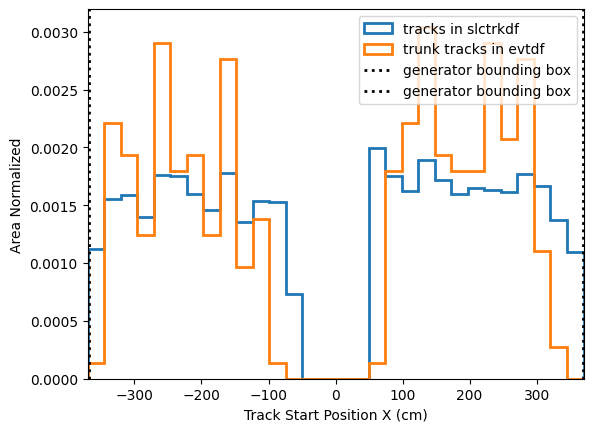

In [15]:
# Note: histograms not the best way to study the volume stuff due to 3D-ality and subtleties with binning. Okay to abandon this - just print min/max values as above to check what I want.
bins=30
myrange=(-370, 370)
myDensity=True
plt.hist(slctrkdf.pfp.trk.start.x, bins, histtype='step', label='tracks in slctrkdf', density=myDensity, linewidth=2, range=myrange)
plt.hist(evtdf.trunk.trk.start.x, bins, histtype='step', label='trunk tracks in evtdf', density=myDensity, linewidth=2, range=myrange)
plt.axvline([-368.49], linestyle=":", color="black", label='generator bounding box', linewidth=2)
plt.axvline([368.49], linestyle=":", color="black", linewidth=2)
plt.axvline([-368.49], linestyle=":", color="black", label='fiducialization for ', linewidth=2)

#plt.title('Track Start Position X (cm)')
plt.legend()
if myDensity: plt.ylabel('Area Normalized')
plt.xlabel('Track Start Position X (cm)')
plt.xlim(myrange)
plt.show()